# Melissa Wright - WeatherPy Homework
----

#### The objective is to build a series of scatter plots to showcase the following relationships:
----

- Temperature (F) vs. Latitude 
-  Humidity (%) vs. Latitude 
- Cloudiness (%) vs. Latitude 
- Wind Speed (mph) vs. Latitude

# Final notebook must:

* Randomly selecting at least 500 unique (non-repeat) cities based on latitude and longitude. 
* Perform a weather check on each of the cities using a series of successive API calls. 
* Include a print log of each city as it's being processed with the city number and city name. 
* Save both a CSV of all data retrieved and png images for each scatter plot.

# As final considerations:

* Create a new GitHub repository for this project called API-Challenge. 

    * Complete analysis using a Jupyter notebook. Use the Matplotlib or Pandas plotting libraries. 
    * Include a written description of three observable trends based on the data. You must use proper labeling 
    * Include Plot Titles (with date of analysis) and Axes Labels. See Example Solution for a reference
    
** Sources used inclde: youtube.com/watch?v=53AoDB7vcbU 


## Observable Trends

#### Temperature 

* There is a very strong relationship between the change in temperature and the latitude as you move away from 0 (the equator) the max temperature goes down. This indicates the max temperature is higher closer to 0 (the equator) with only a few outliers that are surprizingly south of the equator that have a higher max temperature. 

#### Humidity 
* With the exception of some outliers, there is a pattern showing an increase of humidity cluster 80 degrees north of the equator and -20 degrees South of the Equator showing that the areas with lower temperatures tend to have higher humidity when north of the equator. 

#### Cloudiness 
* There is inconclusive results to show there is a strong relationship between Cloudiness and latitude. The cloudiness varies evenly both high and low at the same distance away from the equator. 

#### Windspeed 
* There is inconclusive results to show there is a strong relationship between Wind Speed and latitude. The wind speeds pattern is similar accorss the random cities. 

### In Conclusion : Between (Temperature, Cloudiness, Humidity and Wind Speed) and Latitude; The plots show that the strongest relationship exists between Temperature and Latitude. 

In [116]:
%matplotlib inline


In [117]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow
from urllib.error import HTTPError
from pprint import pprint
import os
import random
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [118]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [119]:
# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# define setting and parameters
setting = {'units':'Imperial','appid':api_key}
parameters = ['clouds.all','sys.country','dt','main.humidity','main.temp_max','wind.speed','coord.lat','coord.lon']

In [120]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
#record = 1

In [121]:
# loop through cities, make API request, and append desired results
# Include a print log of each city as it's being processed (with the city number and city name).
#Source: https://openweathermap.org/current
#Source : example of another similar weather call. https://codereview.stackexchange.com/questions/131371/script-to-print-weather-report-from-openweathermap-api

print('Beginning Data Retrieval')
print('---------------------')
counter = 1
for city in cities:
    city_url = base_url + '&q=' + city.replace(' ','+')
    print(f'Processing City # {counter} | {city}')
    print(city_url)
    try:
        city_data = ow.get_current(city,**setting)
        cl,ct,dt,hm,mt,ws,lt,ln = city_data(*parameters)
        cloudiness.append(cl)
        country.append(ct)
        date.append(dt)
        humidity.append(hm)
        max_temp.append(mt)
        wind_speed.append(ws)
        lat.append(lt)
        lng.append(ln)
        city_name.append(city)
    except HTTPError:
        print('City not found. skipping...')
    counter += 1
print('---------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
---------------------
Processing City # 1 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=hobart
Processing City # 2 | dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=dingle
Processing City # 3 | burnie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=burnie
Processing City # 4 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=kapaa
Processing City # 5 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=ushuaia
Processing City # 6 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=kaitangata
Processing City # 7 | san quintin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c

Processing City # 57 | bloomington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=bloomington
Processing City # 58 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=bluff
Processing City # 59 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=saskylakh
Processing City # 60 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=butaritari
Processing City # 61 | kota belud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=kota+belud
Processing City # 62 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=atuona
Processing City # 63 | zhirnov
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a0391

Processing City # 112 | pitimbu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=pitimbu
Processing City # 113 | sistranda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=sistranda
Processing City # 114 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=bredasdorp
Processing City # 115 | guaruja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=guaruja
Processing City # 116 | bondo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=bondo
Processing City # 117 | salinas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=salinas
Processing City # 118 | kadykchan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q

Processing City # 168 | mandalgovi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=mandalgovi
Processing City # 169 | ust-uda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=ust-uda
Processing City # 170 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=new+norfolk
Processing City # 171 | palmital
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=palmital
Processing City # 172 | seoul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=seoul
Processing City # 173 | bay-khaak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=bay-khaak
Processing City # 174 | amderma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089

Processing City # 224 | mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=mahebourg
Processing City # 225 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=provideniya
Processing City # 226 | kendari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=kendari
Processing City # 227 | lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=lompoc
Processing City # 228 | umm durman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=umm+durman
City not found. skipping...
Processing City # 229 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=nanortalik
Processing City # 230 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Im

City not found. skipping...
Processing City # 281 | wanning
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=wanning
Processing City # 282 | yabrud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=yabrud
Processing City # 283 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=upernavik
Processing City # 284 | sur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=sur
Processing City # 285 | iaciara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=iaciara
Processing City # 286 | ambilobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=ambilobe
Processing City # 287 | khadyzhensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a

Processing City # 338 | sainte-agathe-des-monts
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=sainte-agathe-des-monts
Processing City # 339 | alotau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=alotau
City not found. skipping...
Processing City # 340 | turan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=turan
Processing City # 341 | shache
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=shache
Processing City # 342 | bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=bonavista
Processing City # 343 | berlevag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=berlevag
Processing City # 344 | gigant
http://api.openweathermap.org/data/2.5/weather?units=

Processing City # 395 | esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=esperance
Processing City # 396 | saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=saleaula
City not found. skipping...
Processing City # 397 | riyadh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=riyadh
Processing City # 398 | hedaru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=hedaru
Processing City # 399 | iguape
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=iguape
Processing City # 400 | kawalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=kawalu
Processing City # 401 | tongren
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a86

Processing City # 451 | inirida
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=inirida
Processing City # 452 | nichinan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=nichinan
Processing City # 453 | hue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=hue
Processing City # 454 | dawson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=dawson
Processing City # 455 | altamira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=altamira
Processing City # 456 | taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=taoudenni
Processing City # 457 | sorvag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=sorvag
Cit

City not found. skipping...
Processing City # 507 | richards bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=richards+bay
Processing City # 508 | edeia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=edeia
Processing City # 509 | sataua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=sataua
City not found. skipping...
Processing City # 510 | pochutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=pochutla
Processing City # 511 | devarkonda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=devarkonda
Processing City # 512 | bursa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=bursa
Processing City # 513 | nishihara
http://api.openweathermap.org/data/2.5/weath

Processing City # 564 | saint albans
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=saint+albans
Processing City # 565 | albury
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=albury
Processing City # 566 | launceston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=launceston
Processing City # 567 | pskov
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=pskov
Processing City # 568 | coos bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=coos+bay
Processing City # 569 | soyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=soyo
Processing City # 570 | manthani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=

Processing City # 620 | sobolevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=sobolevo
Processing City # 621 | camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=camacha
Processing City # 622 | west wendover
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=west+wendover
Processing City # 623 | ninghai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=ninghai
Processing City # 624 | dubna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=dubna
Processing City # 625 | kirkland lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a864827229089a03911&q=kirkland+lake
Processing City # 626 | bosaso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8573baf3c5b21a8648272

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [122]:
#Converting Raw Data to Dataframe. 
#Source: https://openweathermapy.readthedocs.io/en/latest/ 

# Create a dictonary with the lists generated
city_data = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp F": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_df = pd.DataFrame(city_data)

# Display count of weather data values 
weather_df.count()


# Export the city data into a .csv.
weather_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)


# Display the DataFrame
weather_df.head(8)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp F,Wind Speed
0,hobart,75,AU,1578901503,63,-42.88,147.33,71.01,27.51
1,dingle,100,PH,1578901768,84,11.00,122.67,78.46,9.35
2,burnie,5,AU,1578901168,66,-41.07,145.92,66.99,8.01
3,kapaa,90,US,1578901371,88,22.08,-159.32,73.99,4.70
4,ushuaia,40,AR,1578901573,87,-54.80,-68.30,50.00,5.82
5,kaitangata,0,NZ,1578901629,59,-46.28,169.85,55.00,11.99
6,san quintin,0,MX,1578901714,85,30.48,-115.95,55.24,12.88
7,kodiak,90,US,1578901613,74,57.79,-152.41,36.00,9.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

* Temperature (F) vs. Latitude 
* Humidity (%) vs. Latitude 
* Cloudiness (%) vs. Latitude 
* Wind Speed (mph) vs. Latitude

#### Latitude vs. Temperature Plot

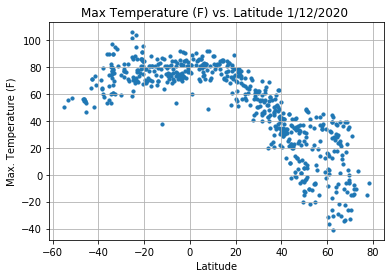

In [123]:
# Build a scatter plot for each data type
#m1 -  Temp vs. Latitude
#Source: https://matplotlib.org 


plt.scatter(weather_df["Lat"], weather_df["Max Temp F"], marker="o", s=10)

# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.

plt.title("Max Temperature (F) vs. Latitude 1/12/2020 ")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# * Save the plotted figures as .pngs.
plt.savefig("Max_temp_vs_Latitude_1.12.2020.png")

# Show plot
plt.show()

#### Latitude vs. Humidity (%) Plot

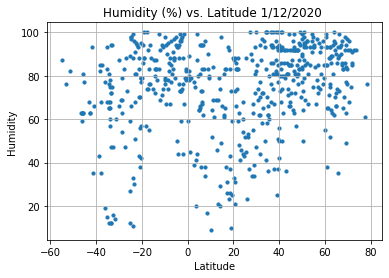

In [124]:
# Build a scatter plot for each data type
# 2 - Humidity (%) vs. Latitude 
#Source: https://matplotlib.org 
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=10)

# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.

plt.title("Humidity (%) vs. Latitude 1/12/2020 ")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# * Save the plotted figures as .pngs.
plt.savefig("Humidity_vs_Latitude_1.12.2020.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness (%) Plot

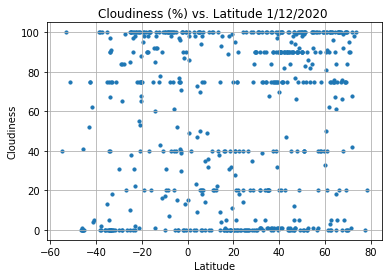

In [125]:
# Build a scatter plot for each data type
# 3 - Cloudiness (%) vs. Latitude 
#Source: https://matplotlib.org 
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=10)

# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.

plt.title("Cloudiness (%) vs. Latitude 1/12/2020 ")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# * Save the plotted figures as .pngs.
plt.savefig("Cloudiness_vs_Latitude_1.12.2020.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed (mph) Plot

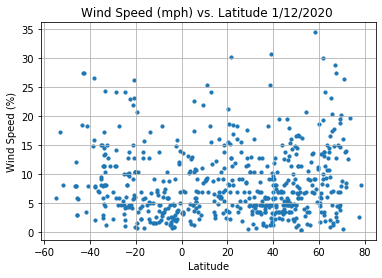

In [126]:
# Build a scatter plot for each data type
# 4 - Wind Speed (mph) vs. Latitude 
#Source: https://matplotlib.org 
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=10)

# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.

plt.title("Wind Speed (mph) vs. Latitude 1/12/2020 ")
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# * Save the plotted figures as .pngs.
plt.savefig("Wind_speed_vs_Lat_1.12.2020.png")

# Show plot
plt.show()

## Final Observation : Between (Temperature, Cloudiness, Humidity and Wind Speed) and Latitude; The plots show that the strongest relationship exists between Temperature and Latitude. 
